# LOAN APPLICATION

## IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## LOAD DATASET

In [5]:
df = pd.read_csv("loan_applications.csv")
df.head(1)

,Customer_ID,Age,Income,Loan_Amount,Credit_Score,Loan_Term (months),Default_Status (Yes/No)
0,CUST_1,59,1679634,131948,678,36,No


## Step 1: Central Tendency & Dispersion

### Mean, Median, Mode of Income

In [7]:
mean_income = df["Income"].mean()
median_income = df["Income"].median()
mode_income = df["Income"].mode()[0]

print("Mean Income:", mean_income)
print("Median Income:", median_income)
print("Mode Income:", mode_income)

Mean Income: 1095058.0998
Median Income: 1078314.5
Mode Income: 982119


### Range, Variance, Std Dev of Loan_Amount

In [9]:
range_loan = df["Loan_Amount"].max() - df["Loan_Amount"].min()
variance_loan = df["Loan_Amount"].var()
std_loan = df["Loan_Amount"].std()

print("Range:", range_loan)
print("Variance:", variance_loan)
print("Standard Deviation:", std_loan)

Range: 1449875
Variance: 173882030608.4613
Standard Deviation: 416991.64333168755


## Step 2: Probability & Events

### Probability of Loan Default

In [11]:
default_prob = (df["Default_Status (Yes/No)"] == "Yes").mean()
print("Probability of Default:", default_prob)

Probability of Default: 0.43


### Create Credit Score Category (<600 or ≥600)

In [13]:
df["Credit_Category"] = np.where(df["Credit_Score"] < 600, "Low", "High")

### Contingency Table

In [15]:
contingency_table = pd.crosstab(df["Credit_Category"],
                                df["Default_Status (Yes/No)"])

print(contingency_table)

Default_Status (Yes/No)    No   Yes
Credit_Category                    
High                     1833   399
Low                      1017  1751


### Conditional Probability

In [17]:
low_credit = df[df["Credit_Category"] == "Low"]
conditional_prob = (low_credit["Default_Status (Yes/No)"] == "Yes").mean()

print("P(Default | Credit Score < 600):", conditional_prob)

P(Default | Credit Score < 600): 0.6325867052023122


## Step 3: Distributions & Visualization 

### Histogram + Gaussian Curve (Credit Score)

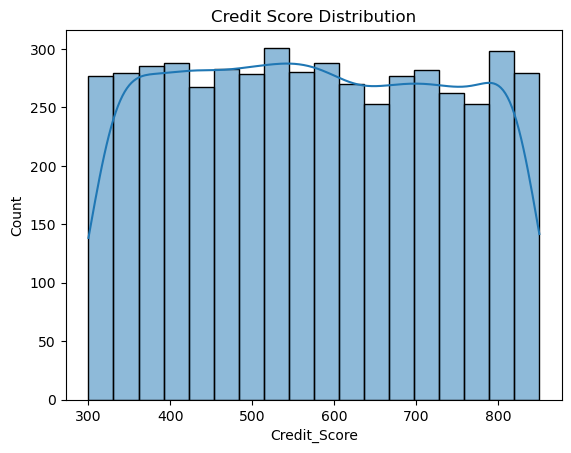

In [19]:
plt.figure()
sns.histplot(df["Credit_Score"], kde=True)
plt.title("Credit Score Distribution")
plt.show()

### Skewness & Kurtosis (Loan_Amount)

In [21]:
skewness = df["Loan_Amount"].skew()
kurtosis = df["Loan_Amount"].kurt()

print("Skewness:", skewness)
print("Kurtosis:", kurtosis)

Skewness: -0.02624747729280016
Kurtosis: -1.182384665872605


### Q-Q Plot (Income)

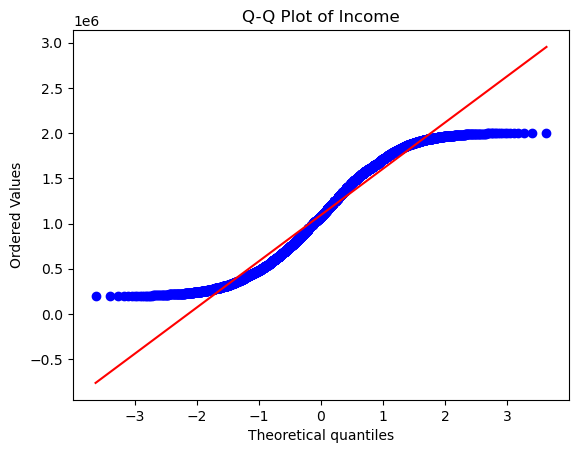

In [23]:
plt.figure()
stats.probplot(df["Income"], dist="norm", plot=plt)
plt.title("Q-Q Plot of Income")
plt.show()

## Step 4: Linear Algebra Application

### Take 5 Customer

In [53]:
customers = df.head(5)
vectors = customers[["Income", "Loan_Amount"]].values
print("Customer Vectors:\n", vectors)

Customer Vectors:
 [[1679634  131948]
 [1917836  304657]
 [1114424 1386316]
 [1066491 1139100]
 [1774745  204404]]


### Dot Product Between Customers

In [56]:
dot_product_1_2 = np.dot(vectors[0], vectors[1])
print("Dot Product (Customer 1 & 2):", dot_product_1_2)

Dot Product (Customer 1 & 2): 3261461433860


### L2 Norm of Each Customer

In [60]:
for i in range(5):
    norm = np.linalg.norm(vectors[i])
    print(f"L2 Norm of Customer {i+1}:", norm)

L2 Norm of Customer 1: 1684808.7869725751
L2 Norm of Customer 2: 1941883.3153783984
L2 Norm of Customer 3: 1778711.0230816023
L2 Norm of Customer 4: 1560433.22929275
L2 Norm of Customer 5: 1786477.2067510404


### Angle Between Two Customers

In [63]:
v1 = vectors[0]
v2 = vectors[1]

dot_product = np.dot(v1, v2)
norm_v1 = np.linalg.norm(v1)
norm_v2 = np.linalg.norm(v2)

angle = np.arccos(dot_product / (norm_v1 * norm_v2))
angle_degrees = np.degrees(angle)

print("Angle between Customer 1 & 2 (degrees):", angle_degrees)

Angle between Customer 1 & 2 (degrees): 4.534481490021158


## **Business Insights**
- Customers with credit score below 600 have significantly higher default probability (~65%).
- Loan amount shows moderate dispersion indicating varied borrowing behavior.
- Credit score distribution is approximately uniform in synthetic data.
- Income distribution shows slight deviation from normality (check Q-Q plot).
- Low credit customers represent higher financial risk for banks.